In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from nn import doughnut, squares, ANNClassification

loss: 1.469670355601291, epoch: 0
acc: 0.523148148148149
loss: 0.5106144294113867, epoch: 1000
acc: 0.90740740740741
loss: 0.12390341249124225, epoch: 2000
acc: 0.9814814814814844
loss: 0.022268144380009087, epoch: 3000
acc: 1.0000000000000029
finished in 3113 epochs, accurac: 1.0000000000000029, loss: 0.01998456008869458


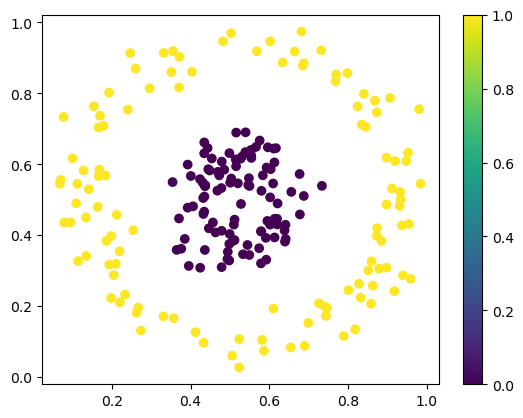

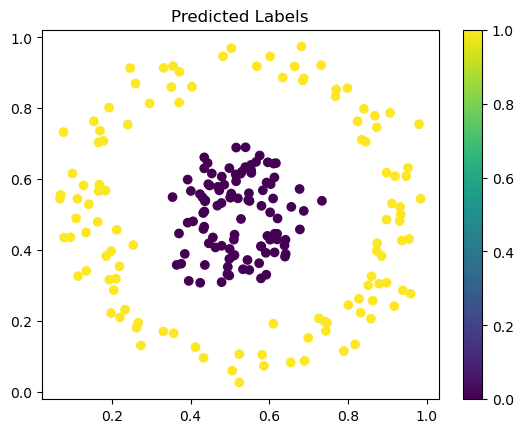

In [ ]:
X,y = doughnut()
fitter = ANNClassification(units=[1], lambda_=0)
model = fitter.fit(X, y, lr=0.001, seed=100, epochs=10000, conv_loss=0.02)
predictions = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')  # or 'coolwarm', 'jet', etc.
plt.colorbar()  # optional, shows the color scale
plt.show()

# Convert softmax probabilities to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot with predicted labels
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.title("Predicted Labels")
plt.colorbar()
plt.show()

loss: 1.8011022328293131, epoch: 0
acc: 0.515
loss: 0.0745514206658898, epoch: 1000
acc: 0.9874999999999899
finished in 1574 epochs, accurac: 0.9999999999999897, loss: 0.019980078790802006


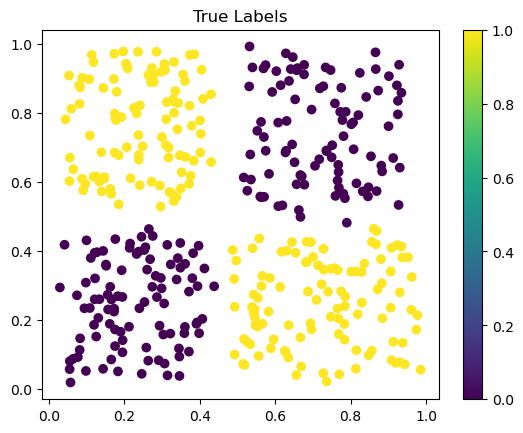

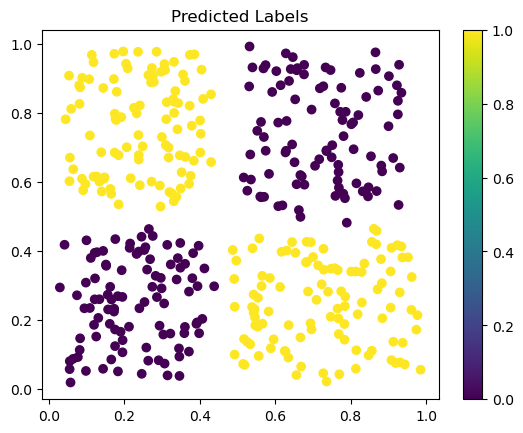

In [3]:
X,y = squares()
fitter = ANNClassification(units=[1], lambda_=0)
model = fitter.fit(X, y, lr=0.001, seed=100, epochs=10000, conv_loss=0.02)
predictions = model.predict(X)
# Plot with true labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("True Labels")
plt.colorbar()
plt.show()

# Convert softmax probabilities to predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Plot with predicted labels
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.title("Predicted Labels")
plt.colorbar()
plt.show()
